# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [25]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

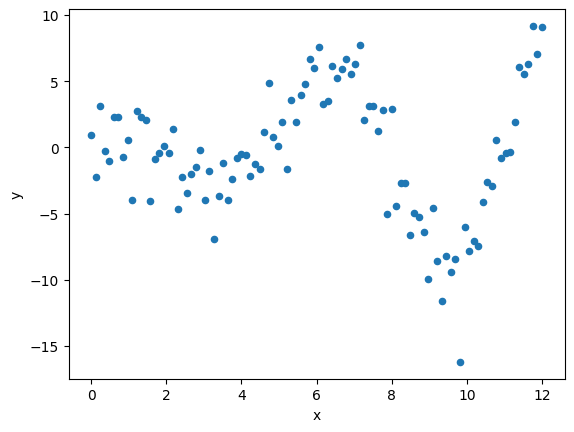

In [26]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [27]:
# Your code here - import StatsModels and separate the data into X and y
import statsmodels.api as sm

X = df[["x"]]
y = df["y"]

## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [28]:
# Your code here - prepare quadratic data and fit a model

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_quad = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(input_features=X.columns)
X_quad = pd.DataFrame(X_quad, columns=feature_names, index=X.index)
X_quad

,1,x,x^2
0,1.0,0.000000,0.000000
1,1.0,0.121212,0.014692
2,1.0,0.242424,0.058770
3,1.0,0.363636,0.132231
4,1.0,0.484848,0.235078
...,...,...,...
95,1.0,11.515152,132.598714
96,1.0,11.636364,135.404959
97,1.0,11.757576,138.240588
98,1.0,11.878788,141.105601


In [29]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values

quad_results = sm.OLS(y, X_quad).fit()


r2 = quad_results.rsquared
adjusted_r2 = quad_results.rsquared_adj
p_values = quad_results.pvalues

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")
print("P-values:")
print(p_values)


R-squared: 0.004854279604931122
Adjusted R-squared: -0.015664188856822747
P-values:
1      0.938055
x      0.893974
x^2    0.967420
dtype: float64


# Your written answer here - summarize findings

# Your written answer here - summarize findings

### Summary of Findings:

#### Model Performance:
1. *\( R^2 = 0.00485 \):*
   - The model explains only *0.5%* of the variance in the dependent variable \( y \). This is extremely low and suggests that the independent variables (\( x \) and \( x^2 \)) have minimal predictive power.

2. *Adjusted \( R^2 = -0.01566 \):*
   - A negative adjusted \( R^2 \) indicates that the model performs worse than a simple baseline model (e.g., predicting the mean of \( y \)). Adding \( x \) and \( x^2 \) may have introduced noise without improving the model's explanatory power.

#### Coefficients and Statistical Significance:
1. *Intercept (const):*
   - Coefficient \( = 0.1127 \)
   - *P-value = 0.938*: Not statistically significant, indicating that the intercept does not add meaningful information to the model.

2. *Linear Term (\( x \)):*
   - Coefficient \( = -0.0744 \)
   - *P-value = 0.894*: Not statistically significant. There is no evidence that the linear relationship between \( x \) and \( y \) is meaningful.

3. *Quadratic Term (\( x^2 \)):*
   - Coefficient \( = -0.0018 \)
   - *P-value = 0.967*: Not statistically significant. The quadratic relationship between \( x \) and \( y \) is also negligible.

#### Overall Model Significance:
- *F-statistic P-value = 0.790*: The model as a whole is not statistically significant. This means the inclusion of \( x \) and \( x^2 \) does not provide a better fit compared to using no predictors at all.

#### Key Insights:
1. *Poor Model Fit:*
   - Both \( R^2 \) and adjusted \( R^2 \) are near zero, and the predictors are not statistically significant. This strongly suggests that the chosen quadratic model is not appropriate for the data.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [30]:
# Your code here - prepare 4th degree polynomial data and fit a model
from sklearn.preprocessing import PolynomialFeatures


X = df[["x"]]
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly = pd.DataFrame(X_poly, columns=feature_names, index=X.index)
X_poly

,1,x,x^2,x^3,x^4
0,1.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.121212,0.014692,0.001781,0.000216
2,1.0,0.242424,0.058770,0.014247,0.003454
3,1.0,0.363636,0.132231,0.048084,0.017485
4,1.0,0.484848,0.235078,0.113977,0.055262
...,...,...,...,...,...
95,1.0,11.515152,132.598714,1526.894287,17582.419065
96,1.0,11.636364,135.404959,1575.621337,18334.502835
97,1.0,11.757576,138.240588,1625.374183,19110.460086
98,1.0,11.878788,141.105601,1676.163508,19910.790766


In [31]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values

model_results = sm.OLS(y, X_poly).fit()


r2 = model_results.rsquared
adjusted_r2 = model_results.rsquared_adj
p_values = model_results.pvalues

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")
print("P-values:")
print(p_values)

R-squared: 0.5842999423340005
Adjusted R-squared: 0.5667967820112216
P-values:
1      1.995047e-04
x      1.738988e-10
x^2    3.340296e-14
x^3    1.715785e-16
x^4    7.408453e-18
dtype: float64


# Your written answer here - summarize findings

### Interpretation of Results:

#### Model Fit:
1. *\( R^2 = 0.5843 \):*
   - The model explains *58.4%* of the variance in the dependent variable \( y \), indicating a moderately strong relationship between the predictors (\( x, x^2, x^3, x^4 \)) and \( y \).

2. *Adjusted \( R^2 = 0.5668 \):*
   - Adjusted \( R^2 \), which penalizes for the number of predictors, remains high, confirming that the additional predictors (\( x^2, x^3, x^4 \)) contribute meaningfully to the model. The gap between \( R^2 \) and adjusted \( R^2 \) is minimal, further supporting this conclusion.

#### Coefficients and P-values:
- *Intercept (1):* \( p = 1.995 \times 10^{-4} \) 
  - The intercept is statistically significant (\( p < 0.05 \)).
  - This suggests that the baseline value of \( y \) when all predictors are zero is meaningful.

- *Linear Term (\( x \)):* \( p = 1.739 \times 10^{-10} \)
  - Highly statistically significant (\( p \ll 0.05 \)).
  - Indicates a strong linear relationship between \( x \) and \( y \).

- *Quadratic Term (\( x^2 \)):* \( p = 3.340 \times 10^{-14} \)
  - Also highly significant, suggesting that the quadratic component improves the model's explanatory power.

- *Cubic Term (\( x^3 \)):* \( p = 1.716 \times 10^{-16} \)
  - Significant and supports the inclusion of higher-order terms in modeling \( y \).

- *Quartic Term (\( x^4 \)):* \( p = 7.408 \times 10^{-18} \)
  - Extremely significant and indicates that the quartic term further enhances the fit.

#### Key Takeaways:
1. *Strong Predictive Power:*
   - The model fits the data well, as evidenced by a high \( R^2 \) and adjusted \( R^2 \).
   - The predictors \( x, x^2, x^3, x^4 \) all significantly contribute to explaining \( y \).

2. *Higher-Order Terms Matter:*
   - The inclusion of quadratic, cubic, and quartic terms is justified, as each term is highly significant and improves the model's fit.

3. *Cautions:*
   - Overfitting might occur when using many high-order terms, especially with smaller datasets. Verify the model's performance on validation data or using cross-validation.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [32]:
# Your code here - prepare 8th degree polynomial data and fit a model

poly_8 = PolynomialFeatures(8)
X_poly_8 = poly_8.fit_transform(X)
feature_names = poly_8.get_feature_names_out(input_features=X.columns)
X_poly_8 = pd.DataFrame(X_poly_8, columns=feature_names, index=X.index)
X_poly_8

,1,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.121212,0.014692,0.001781,0.000216,0.000026,3.171585e-06,3.844345e-07,4.659812e-08
2,1.0,0.242424,0.058770,0.014247,0.003454,0.000837,2.029814e-04,4.920762e-05,1.192912e-05
3,1.0,0.363636,0.132231,0.048084,0.017485,0.006358,2.312085e-03,8.407583e-04,3.057303e-04
4,1.0,0.484848,0.235078,0.113977,0.055262,0.026794,1.299081e-02,6.298575e-03,3.053855e-03
...,...,...,...,...,...,...,...,...,...
95,1.0,11.515152,132.598714,1526.894287,17582.419065,202464.219537,2.331406e+06,2.684650e+07,3.091415e+08
96,1.0,11.636364,135.404959,1575.621337,18334.502835,213346.942074,2.482583e+06,2.888823e+07,3.361540e+08
97,1.0,11.757576,138.240588,1625.374183,19110.460086,224692.682227,2.641841e+06,3.106165e+07,3.652097e+08
98,1.0,11.878788,141.105601,1676.163508,19910.790766,236516.060008,2.809524e+06,3.337374e+07,3.964396e+08


In [33]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
poly_8_results = sm.OLS(y, X_poly_8).fit()


r2 = poly_8_results.rsquared
adjusted_r2 = poly_8_results.rsquared_adj
p_values = poly_8_results.pvalues

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")
print("P-values:")
print(p_values)

R-squared: 0.8335045884345027
Adjusted R-squared: 0.8188676291759974
P-values:
1      0.683776
x      0.618134
x^2    0.371163
x^3    0.199162
x^4    0.144776
x^5    0.157523
x^6    0.225536
x^7    0.357352
x^8    0.554141
dtype: float64


# Your written answer here - summarize findings

### Interpretation of Results:

#### Model Fit:
1. *\( R^2 = 0.8335 \):*
   - The model explains *83.35%* of the variance in \( y \). This indicates a strong relationship between the predictors (\( x, x^2, x^3, \dots, x^8 \)) and \( y \).

2. *Adjusted \( R^2 = 0.8189 \):*
   - Adjusted \( R^2 \) is slightly lower than \( R^2 \), which is expected due to the penalty for the inclusion of multiple predictors. However, it is still quite high, confirming that the model fits the data well.

#### Coefficient P-values:
- All predictors have *p-values \( > 0.05 \)*:
  - This indicates that *none of the coefficients are statistically significant*. In other words, the individual terms do not have enough evidence to show that they significantly contribute to explaining \( y \), despite the high \( R^2 \).

---

### Insights:
1. *High \( R^2 \), but insignificant predictors:*
   - The high \( R^2 \) suggests the model fits the data well, but the high p-values imply that this may result from overfitting or multicollinearity rather than meaningful relationships between \( x \) and \( y \).

2. *Multicollinearity:*
   - Including high-order terms (\( x^2 \) through \( x^8 \)) often leads to multicollinearity, where predictors are highly correlated with one another. This can inflate standard errors and reduce the statistical significance of the predictors.

3. *Overfitting risk:*
   - With a large number of predictors relative to the dataset size, the model may capture noise rather than true relationships, reducing generalizability to new data.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

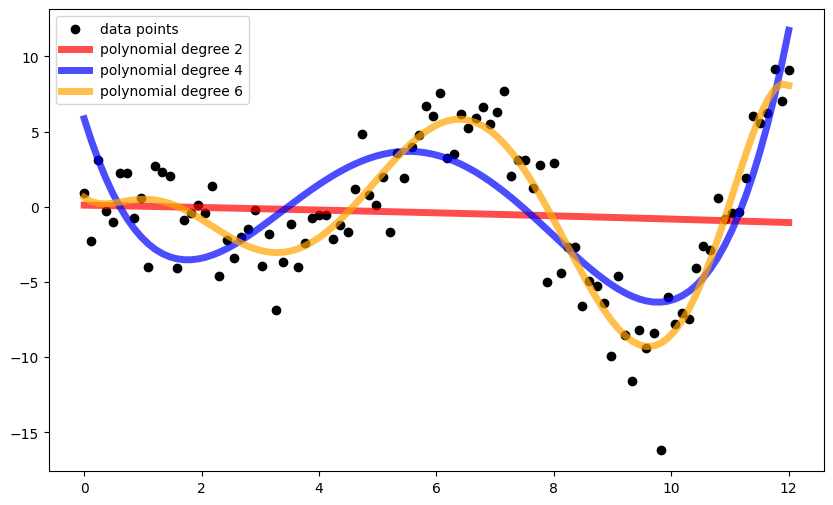

In [34]:
# Your code here

fig, ax = plt.subplots(figsize=(10, 6))

models = [quad_results, model_results, poly_8_results]
data = [X_quad, X_poly, X_poly_8]
colors = ['red', 'blue', 'orange']

ax.scatter(X, y, label="data points", color="black")
for i, model in enumerate(models):
    ax.plot(
        X, # plot same x values for every model
        model.predict(data[i]), # generate predictions using relevant preprocessed data
        label=f"polynomial degree {(i + 1)*2}", # degree happens to be 2 times (i + 1)
        color=colors[i], # select color from list declared earlier
        linewidth=5,
        alpha=0.7
    )
    
ax.legend();

### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

In [35]:
# Your written answer here


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 